# Forecasting and Comparing Palm Oil, Green Coffee, and Rice Production in ASEAN Using LSTM

This notebook focuses on forecasting and comparing the production of three major agricultural commodities in Southeast Asia:  
**palm oil**, **green coffee**, and **rice**.

The objective is to analyze Indonesia’s production trends and compare them against three other key ASEAN countries: **Vietnam, Thailand, and Malaysia**.

Long Short-Term Memory (LSTM) is used to model and predict the future production trends of each commodity up to the year **2030**.

📂 Dataset used: [World Food Production Dataset on Kaggle](https://www.kaggle.com/datasets/rafsunahmad/world-food-production/data)

### 🔍 Project Workflow:
- Load and explore historical data from 1961 to 2023
- Focus on four ASEAN countries: Indonesia, Vietnam, Thailand, and Malaysia
- Visualize production trends for palm oil, green coffee, and rice
- Preprocess and normalize time-series data
- Train separate LSTM models for each commodity and country
- Evaluate model performance
- Forecast production values through 2030 and compare outcomes across countries

The final outcome is expected to provide insights for policy-makers, agricultural analysts, and investors to support long-term planning in the region’s food and agriculture sectors.

## Import Libraries

In [425]:
## Import Libraries

# For data manipulation and numerical operations
import pandas as pd    # Used for handling structured data in tabular format
import numpy as np     # Provides support for large, multi-dimensional arrays and mathematical operations

# For data visualization
import matplotlib.pyplot as plt   # Used to plot line charts, bar charts, and more
import seaborn as sns             # Provides high-level interface for drawing attractive statistical graphics

# For building and training deep learning models (LSTM)
import tensorflow as tf
from tensorflow.keras.models import Sequential          # Linear stack of layers for the model
from tensorflow.keras.layers import LSTM, Dense         # LSTM for time series, Dense for output layer

# For feature scaling (data normalization)
from sklearn.preprocessing import MinMaxScaler          # Scales data to a specific range
from tensorflow.keras.callbacks import EarlyStopping    # callback early stopping


# For model evaluation
from sklearn.metrics import mean_squared_error          # Measures average squared difference between predictions and actual values

# Mount Google Drive to access dataset
from google.colab import drive

## Data Preparation

### Mount Google Drive

In [426]:
drive.mount('/content/drive')  # Mounting Google Drive to access dataset stored in google drive.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Loading

In [427]:
path = '/content/drive/MyDrive/Data-ML/world-food-production.csv' # Path from folder in gdrive
data = pd.read_csv(path)
data.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


In [428]:
# Get column info and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11912 entries, 0 to 11911
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               11912 non-null  object 
 1   Year                                 11912 non-null  int64  
 2   Maize Production (tonnes)            11912 non-null  float64
 3   Rice  Production ( tonnes)           11912 non-null  float64
 4   Yams  Production (tonnes)            11912 non-null  float64
 5   Wheat Production (tonnes)            11912 non-null  float64
 6   Tomatoes Production (tonnes)         11912 non-null  float64
 7   Tea  Production ( tonnes )           11912 non-null  float64
 8   Sweet potatoes  Production (tonnes)  11912 non-null  float64
 9   Sunflower seed  Production (tonnes)  11912 non-null  float64
 10  Sugar cane Production (tonnes)       11912 non-null  float64
 11  Soybeans  Production (tonnes

## Exploratoy Data Analysis (EDA)
This section will help understand the structure of the dataset, check for missing values, and filter only relevant countries and commodities.

### Basic Information

In [429]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")
print("\nAvailable columns:")
print(data.columns.tolist())

Dataset contains 11912 rows and 24 columns.

Available columns:
['Entity', 'Year', 'Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Yams  Production (tonnes)', 'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)', 'Tea  Production ( tonnes )', 'Sweet potatoes  Production (tonnes)', 'Sunflower seed  Production (tonnes)', 'Sugar cane Production (tonnes)', 'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)', 'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)', 'Peas, dry Production ( tonnes)', 'Palm oil  Production (tonnes)', 'Grapes  Production (tonnes)', 'Coffee, green Production ( tonnes)', 'Cocoa beans Production (tonnes)', 'Meat, chicken  Production (tonnes)', 'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)', 'Apples Production (tonnes)']


### Checking Missing Value

In [430]:
data.isnull().sum()

,0
Entity,0
Year,0
Maize Production (tonnes),0
Rice Production ( tonnes),0
Yams Production (tonnes),0
Wheat Production (tonnes),0
Tomatoes Production (tonnes),0
Tea Production ( tonnes ),0
Sweet potatoes Production (tonnes),0
Sunflower seed Production (tonnes),0


### Filter for ASEAN Countries and Selected Commodities

In [431]:
# Countries of interest
target_countries = ['Indonesia', 'Vietnam', 'Thailand', 'Malaysia']

# Selected commodities
selected_columns = [
    'Entity', 'Year',
    'Palm oil  Production (tonnes)',
    'Coffee, green Production ( tonnes)',
    'Rice  Production ( tonnes)'
]

# Filter dataset
df_filtered = data[data['Entity'].isin(target_countries)][selected_columns].copy()

# Display filtered data
df_filtered.head()

,Entity,Year,Palm oil Production (tonnes),"Coffee, green Production ( tonnes)",Rice Production ( tonnes)
5062,Indonesia,1961,21602.0,47.05,7965911.0
5063,Indonesia,1962,23002.0,48.30,8694623.0
5064,Indonesia,1963,24802.0,46.38,8735168.0
5065,Indonesia,1964,25002.0,48.41,9371189.0
5066,Indonesia,1965,27202.0,48.48,9655017.0


In [432]:
## Production summary statistics by country
df_filtered.groupby('Entity').describe(include="all")

Year                                                             \
          count    mean        std     min     25%     50%     75%     max   
Entity                                                                       
Indonesia  61.0  1991.0  17.752934  1961.0  1976.0  1991.0  2006.0  2021.0   
Malaysia   61.0  1991.0  17.752934  1961.0  1976.0  1991.0  2006.0  2021.0   
Thailand   61.0  1991.0  17.752934  1961.0  1976.0  1991.0  2006.0  2021.0   
Vietnam    61.0  1991.0  17.752934  1961.0  1976.0  1991.0  2006.0  2021.0   

          Palm oil  Production (tonnes)                ...  \
                                  count          mean  ...   
Entity                                                 ...   
Indonesia                          61.0  9.632962e+04  ...   
Malaysia                           61.0  1.781007e+04  ...   
Thailand                           61.0  1.443105e+05  ...   
Vietnam                            61.0  2.845310e+06  ...   

          Coffee, green Production ( tonnes)             \
                                         75%        max   
Entity                                                    
Indonesia                          13154.000    17917.0   
Malaysia                         1874104.000  3341727.0   
Thailand                          770794.604  3563795.3   
Vietnam                           125776.180   619294.8   

          Rice  Production ( tonnes)                                          \
                               count          mean           std         min   
Entity                                                                         
Indonesia                       61.0  1.260721e+08  9.921849e+07  7965911.00   
Malaysia                        61.0  4.025641e+06  1.548919e+06  2168060.00   
Thailand                        61.0  2.228531e+07  3.264594e+07   122134.64   
Vietnam                         61.0  2.169337e+07  4.556298e+07    79360.00   

                                                                 
                    25%          50%           75%          max  
Entity                                                           
Indonesia  1.567836e+07  130929230.0  2.048255e+08  318661730.0  
Malaysia   2.468320e+06    3856422.0  5.390534e+06    7328227.5  
Thailand   2.447352e+06    5067367.6  3.865810e+07  140374773.2  
Vietnam    3.331282e+05    1941002.2  2.543364e+06  177062978.0  

[4 rows x 32 columns]

### Rename Columns

In [433]:
# Clean column names by removing ' (tonnes)' from headers
df_filtered.columns = df_filtered.columns.str.replace(' \(tonnes\)', '', regex=True)
df_filtered.columns = df_filtered.columns.str.replace(' \( tonnes\)', '', regex=True)
df_filtered.columns = df_filtered.columns.str.replace('Coffee, green Production', 'Coffee green Production', regex=True)
# Preview renamed columns
df_filtered.head()


,Entity,Year,Palm oil Production,Coffee green Production,Rice Production
5062,Indonesia,1961,21602.0,47.05,7965911.0
5063,Indonesia,1962,23002.0,48.30,8694623.0
5064,Indonesia,1963,24802.0,46.38,8735168.0
5065,Indonesia,1964,25002.0,48.41,9371189.0
5066,Indonesia,1965,27202.0,48.48,9655017.0


### Checking Outlier

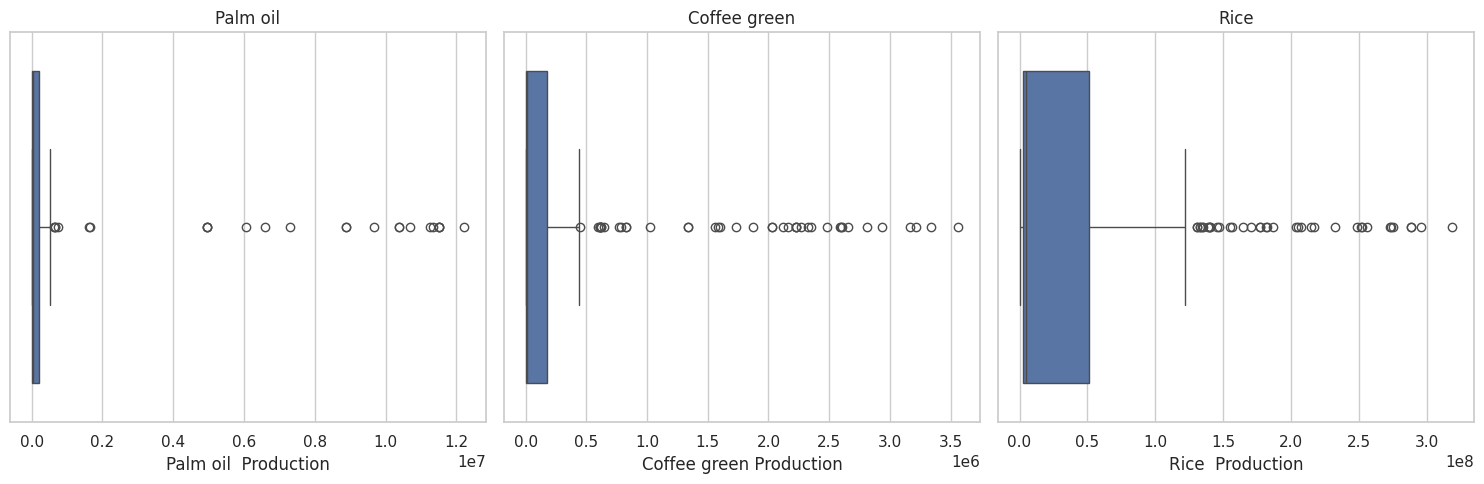

In [434]:
# Check for outliers using boxplots

commodities = [
    'Palm oil  Production',
    'Coffee green Production',
    'Rice  Production'
]

# Create boxplots for each commodity
plt.figure(figsize=(15, 5))
for i, col in enumerate(commodities):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_filtered[col])
    plt.title(col.replace("Production", "").strip())

plt.tight_layout()
plt.show()


## Data Preprocessing

### Outlier Handling
Log transformation is applied to reduce the impact of extreme values in the production data of palm oil, coffee (green), and rice.

In [435]:
# Apply log transformation to selected commodities

df_transformed = df_filtered.copy()

for col in commodities:
    df_transformed[col] = np.log1p(df_transformed[col])

df_transformed.head()

,Entity,Year,Palm oil Production,Coffee green Production,Rice Production
5062,Indonesia,1961,9.980587,3.872242,15.890682
5063,Indonesia,1962,10.043380,3.897924,15.978215
5064,Indonesia,1963,10.118720,3.858200,15.982868
5065,Indonesia,1964,10.126751,3.900153,16.053151
5066,Indonesia,1965,10.211083,3.901569,16.082988


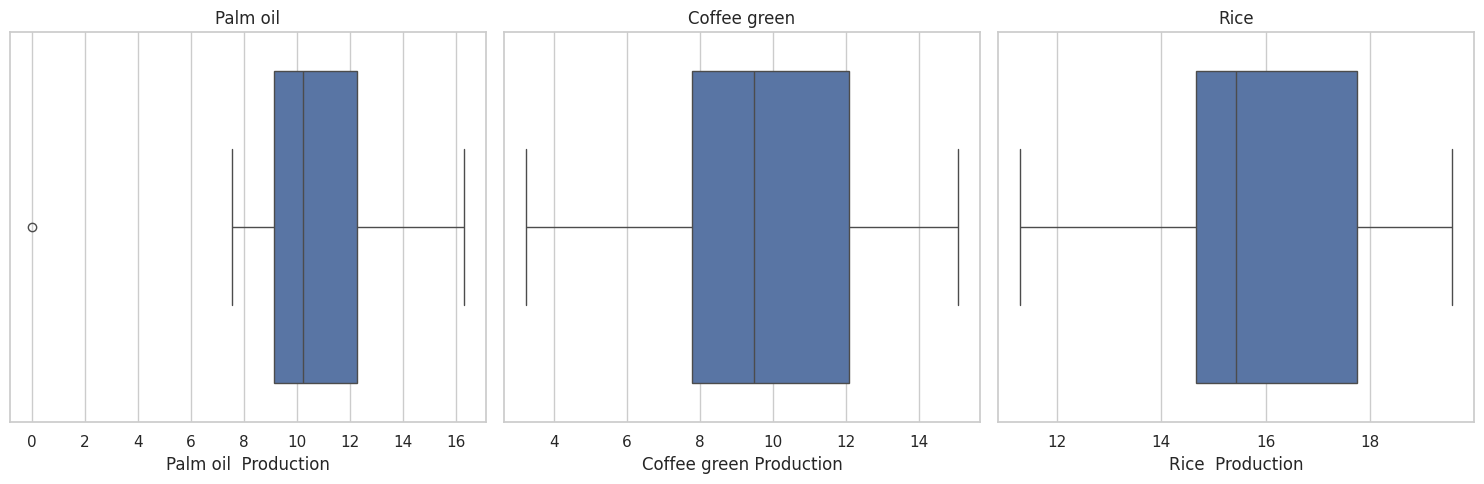

In [436]:
# Visualize after handling outlier
plt.figure(figsize=(15, 5))
for i, col in enumerate(commodities):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_transformed[col])
    plt.title(col.replace("Production", "").strip())
plt.tight_layout()
plt.show()

### Data Normalization
Each commodity's production values are scaled to the range [0, 1] using MinMaxScaler to normalize the value.

In [437]:
# Create a new DataFrame to store normalized values
df_normalized = df_transformed.copy()

# Store scalers in case inverse_transform is needed later (just in case)
scalers = {}

# Apply MinMaxScaler to each commodity column
for col in commodities:
    scaler = MinMaxScaler()
    df_normalized[col] = scaler.fit_transform(df_normalized[[col]])
    scalers[col] = scaler

# Preview normalized values
df_normalized.head()

,Entity,Year,Palm oil Production,Coffee green Production,Rice Production
5062,Indonesia,1961,0.611591,0.055055,0.555434
5063,Indonesia,1962,0.615439,0.057219,0.565982
5064,Indonesia,1963,0.620056,0.053872,0.566543
5065,Indonesia,1964,0.620548,0.057407,0.575013
5066,Indonesia,1965,0.625716,0.057526,0.578609


## Data Splitting

80% of the data is used for training, and the remaining 20% is used for testing to simulate future predictions.

In [438]:
# List of countries and cleaned column names
target_countries = ['Indonesia', 'Vietnam', 'Thailand', 'Malaysia']
commodities = [
    'Palm oil  Production',
    'Coffee green Production',
    'Rice  Production'
]

# Dictionary to hold results
data_splits = {}

for country in target_countries:
    for commodity in commodities:
        key = f"{country} – {commodity}"

        # Filter by country and commodity
        df_sub = df_normalized[df_normalized['Entity'] == country][['Year', commodity]].dropna().reset_index(drop=True)

        if len(df_sub) > 10:
            split_idx = int(len(df_sub) * 0.8)
            train = df_sub[commodity].iloc[:split_idx].values
            test = df_sub[commodity].iloc[split_idx:].values
            test_years = df_sub['Year'].iloc[split_idx + 5:].values  # for LSTM alignment

            # Store to dictionary
            data_splits[key] = {
                'train': train,
                'test': test,
                'years_test': test_years,
                'total_years': len(df_sub)
            }

# Show summary
summary = pd.DataFrame([
    {
        'Country – Commodity': key,
        'Train Length': len(val['train']),
        'Test Length': len(val['test']),
        'Total Years': val['total_years']
    }
    for key, val in data_splits.items()
])

summary

,Country – Commodity,Train Length,Test Length,Total Years
0,Indonesia – Palm oil Production,48,13,61
1,Indonesia – Coffee green Production,48,13,61
2,Indonesia – Rice Production,48,13,61
3,Vietnam – Palm oil Production,48,13,61
4,Vietnam – Coffee green Production,48,13,61
5,Vietnam – Rice Production,48,13,61
6,Thailand – Palm oil Production,48,13,61
7,Thailand – Coffee green Production,48,13,61
8,Thailand – Rice Production,48,13,61
9,Malaysia – Palm oil Production,48,13,61


## Data Reshape

The purpose of this section is to transform each country-commodity time series into a suitable format for LSTM input.

Since LSTM networks require 3D input in the format `[samples, time steps, features]`

In [439]:
# Reshape sequences for all country-commodity pairs
look_back = 5  # Number of years used to predict the next

def create_sequences(series, look_back=5):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i+look_back])
        y.append(series[i+look_back])
    return np.array(X), np.array(y)

reshaped_data = {}

for key, split in data_splits.items():
    train = split['train']
    test = split['test']

    # Generate input-output sequences
    X_train, y_train = create_sequences(train, look_back)
    X_test, y_test = create_sequences(test, look_back)

    # Reshape to 3D for LSTM input
    X_train = X_train.reshape((X_train.shape[0], look_back, 1))
    X_test = X_test.reshape((X_test.shape[0], look_back, 1))

    reshaped_data[key] = {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test,
        'years_test': split['years_test'][:len(y_test)]
    }


In [440]:
# Show all available keys in reshaped_data
print("Available pairs in reshaped_data:")
for key in reshaped_data.keys():
    print("-", key)


Available pairs in reshaped_data:
- Indonesia – Palm oil  Production
- Indonesia – Coffee green Production
- Indonesia – Rice  Production
- Vietnam – Palm oil  Production
- Vietnam – Coffee green Production
- Vietnam – Rice  Production
- Thailand – Palm oil  Production
- Thailand – Coffee green Production
- Thailand – Rice  Production
- Malaysia – Palm oil  Production
- Malaysia – Coffee green Production
- Malaysia – Rice  Production


In [441]:
# Check one to inspect from reshaped_data
key = "Indonesia – Rice  Production"

# Print shapes of each component
print(f"\nData for {key}:")
print("X_train shape:", reshaped_data[key]['X_train'].shape)
print("y_train shape:", reshaped_data[key]['y_train'].shape)
print("X_test shape:", reshaped_data[key]['X_test'].shape)
print("y_test shape:", reshaped_data[key]['y_test'].shape)
print("years_test shape:", reshaped_data[key]['years_test'].shape)


Data for Indonesia – Rice  Production:
X_train shape: (43, 5, 1)
y_train shape: (43,)
X_test shape: (8, 5, 1)
y_test shape: (8,)
years_test shape: (8,)


## Modelling and Testing

### Modelling
An LSTM model is built for each country–commodity pair using the reshaped training data.  
Each model learns to predict the next year's production based on the past years.

The model uses:
- 1 LSTM layer with 50 units
- ReLU activation
- MSE as the loss function
- Adam optimizer


In [442]:
def train_lstm_model(X_train, y_train, X_test, y_test, look_back=5, epochs=100):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Define EarlyStopping
    early_stop = EarlyStopping(
        monitor='loss',
        patience=10,
        restore_best_weights=True,
        mode='min',
        min_delta=0.001,
        verbose=1
    )

    # Train with callback
    model.fit(
        X_train, y_train,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stop]
    )

    # Predict and evaluate
    y_pred = model.predict(X_test, verbose=0)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    return model, y_pred, mse, rmse


In [443]:
# Var for stored the result
model_results = {}

# Loop through all pairs and train models
for key in reshaped_data.keys():
    print(f"\n🚀 Training for {key}")
    data = reshaped_data[key]
    model, y_pred, mse, rmse = train_lstm_model(
        data['X_train'], data['y_train'],
        data['X_test'], data['y_test'],
        look_back=5, epochs=100
    )
    model_results[key] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'y_pred': y_pred
    }


🚀 Training for Indonesia – Palm oil  Production
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.4673
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4396
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4100
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3841
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3549
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3340
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3090
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2845
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2650
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2433
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2224
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1985
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1812
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1627
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1456
Epoch 16/100
2/2 ━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2353
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2205
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2080
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1971
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1836
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1714
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1614
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1511 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1419
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1287
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1175
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1101
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1007
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0882 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0802
Epoch 16/100
2/2 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4304
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3985
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3541
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3192
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2867 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2575
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2200
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1957
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1628
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1394
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1150
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0885
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0711
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0502
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0334 
Epoch 16/100
2/2 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.8382
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.8001
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7747
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7129
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6993
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6693 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6388
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6207
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5705
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5589
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5178
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4987
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4648
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4407
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4087
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.4090
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3855
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3808 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3623
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3412
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3319
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3186
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3006
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2866
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2889
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2605
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2514
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2372
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2252
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2168
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2276
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2065
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1979
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1924
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1758
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1742
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1720
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1611
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1507
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1416
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1262
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1199
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1165
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1027
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0933
Epoch 16/100
2/2 ━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.5170
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4838
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4529 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4221
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3879 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3680
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3390
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3157 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2907
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2771
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2515
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2359 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2140
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1969
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1774
Epoch 16/100
2/2 ━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.5645
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5379
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5100
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4780 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4421
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4175
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3674
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3449
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3166
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2822
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2446
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2213
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1850
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1583
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1341 
Epoch 16/100
2/2 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2966
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2889
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2699
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2633
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2282
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2103
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1890
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1868
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1602
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1538
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1313
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1228
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1124
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0978 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0871
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3417
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3176
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2984
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2765
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2556
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2328
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2209 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2022
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1873
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1754
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1581
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1459
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1310
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1192 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1072 
Epoch 16/100
2/2 ━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1905
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1699 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1732
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1529 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1425
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1394
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1201 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1105
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1010
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0976
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0874 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0735
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0607 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0569 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0467
Epoch 16/100
2/2 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2050
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1903
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1766
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1633
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1530
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1415
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1304
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1196
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1067
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0989
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0894
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0771
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0699 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0594
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0501
Epoch 16/100
2/2 ━━━━━━━━━━━━━

### Testing: Evaluation and Visualization

Each model is evaluated using:
- **MSE (Mean Squared Error)**
- **RMSE (Root Mean Squared Error)**

The predictions are plotted against actual values for both training and testing sets.

#### Table Evaluation MSE and RMSE

In [444]:
results_summary = []

for key in model_results:
    model = model_results[key]['model']
    data = reshaped_data[key]
    y_pred = model.predict(data['X_test'], verbose=0)
    y_true = data['y_test']

    # Get corresponding scaler
    commodity = key.split("–")[-1].strip()
    scaler = scalers[commodity]

    # Inverse transform
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1))

    # Compute errors
    mse = mean_squared_error(y_true_inv, y_pred_inv)
    rmse = mse ** 0.5

    results_summary.append({
        'Country – Commodity': key,
        'MSE': mse,
        'RMSE': rmse
    })

# Convert to DataFrame
results_df = pd.DataFrame(results_summary)
results_df

,Country – Commodity,MSE,RMSE
0,Indonesia – Palm oil Production,0.429887,0.655658
1,Indonesia – Coffee green Production,0.025748,0.160463
2,Indonesia – Rice Production,0.109882,0.331484
3,Vietnam – Palm oil Production,7.281894,2.698499
4,Vietnam – Coffee green Production,7.291881,2.700348
5,Vietnam – Rice Production,0.033783,0.183801
6,Thailand – Palm oil Production,0.115400,0.339706
7,Thailand – Coffee green Production,1.330307,1.153389
8,Thailand – Rice Production,1.506521,1.227404
9,Malaysia – Palm oil Production,2.856282,1.690054


#### Plot Testing and Training

In [445]:
# After getting prediction
scaler_key = key.split("–")[-1].strip()  # Get only the commodity name
scaler = scalers[scaler_key]

# Inverse transform
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(data['y_test'].reshape(-1, 1))


In [446]:
def plot_forecast_with_years_original(key, model, data_dict, scalers, save=False):
    data = data_dict[key]
    commodity = key.split("–")[-1].strip()
    scaler = scalers[commodity]

    # Predict on both sets
    y_train_pred = model.predict(data['X_train'], verbose=0)
    y_test_pred = model.predict(data['X_test'], verbose=0)

    # Inverse transform
    y_train_actual = scaler.inverse_transform(data['y_train'].reshape(-1, 1)).flatten()
    y_train_pred_actual = scaler.inverse_transform(y_train_pred).flatten()

    y_test_actual = scaler.inverse_transform(data['y_test'].reshape(-1, 1)).flatten()
    y_test_pred_actual = scaler.inverse_transform(y_test_pred).flatten()

    # Years
    years_test = data['years_test'][:len(y_test_actual)]
    start_year = years_test[0] - len(y_train_actual)
    years_train = list(range(start_year, years_test[0]))

    # Plot
    plt.figure(figsize=(14, 5))

    # Training
    plt.subplot(1, 2, 1)
    plt.plot(years_train, y_train_actual, label='Actual Train')
    plt.plot(years_train, y_train_pred_actual, '--', label='Predicted Train')
    plt.title(f'Training – {key}')
    plt.xlabel('Year'); plt.ylabel('Production (tonnes)')
    plt.xticks(rotation=45); plt.legend(); plt.grid(True)

    # Testing
    plt.subplot(1, 2, 2)
    plt.plot(years_test, y_test_actual, label='Actual Test')
    plt.plot(years_test, y_test_pred_actual, '--', label='Predicted Test')
    plt.title(f'Testing – {key}')
    plt.xlabel('Year'); plt.ylabel('Production (tonnes)')
    plt.xticks(rotation=45); plt.legend(); plt.grid(True)

    plt.tight_layout()
    if save:
        safe_key = key.replace(" ", "_").replace(",", "").replace("–", "-")
        plt.savefig(f"{safe_key}.png")
    plt.show()



📊 Visualizing forecast for Indonesia – Palm oil  Production


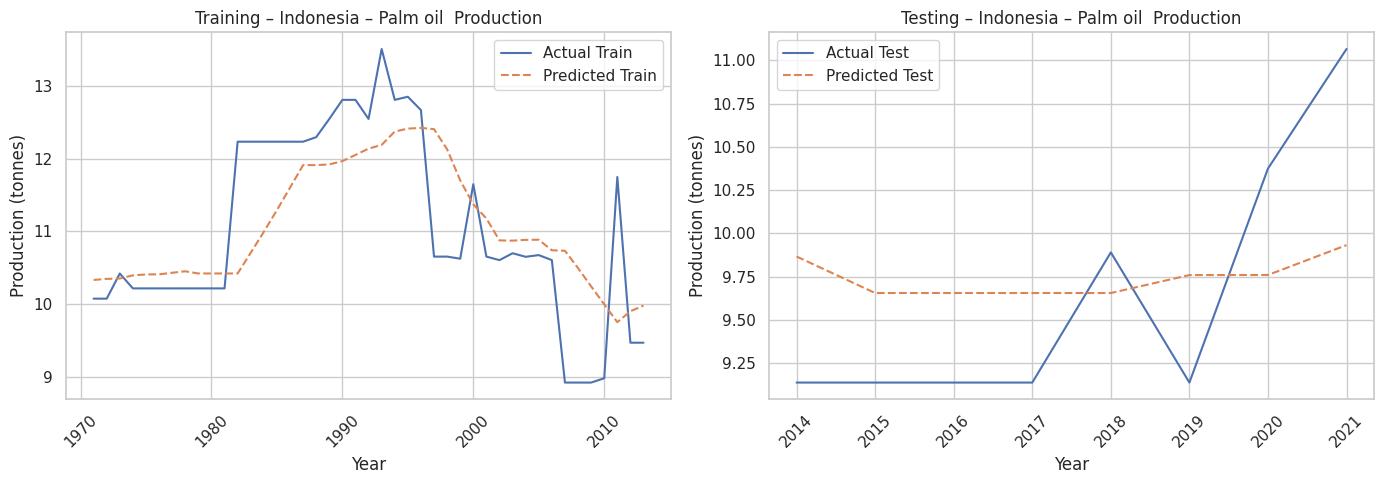


📊 Visualizing forecast for Indonesia – Coffee green Production


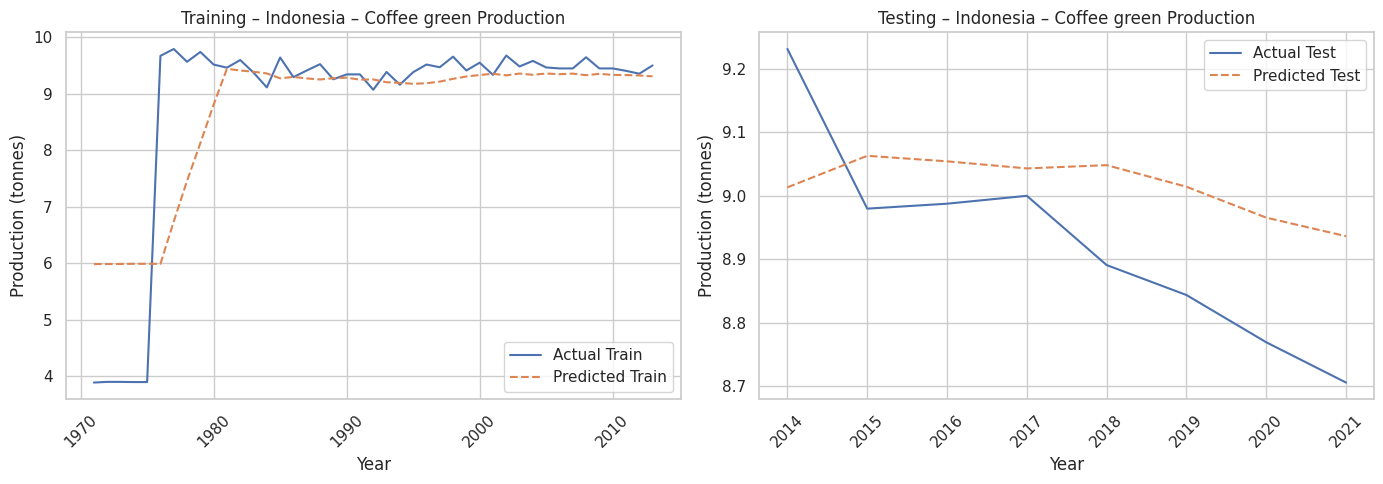


📊 Visualizing forecast for Indonesia – Rice  Production


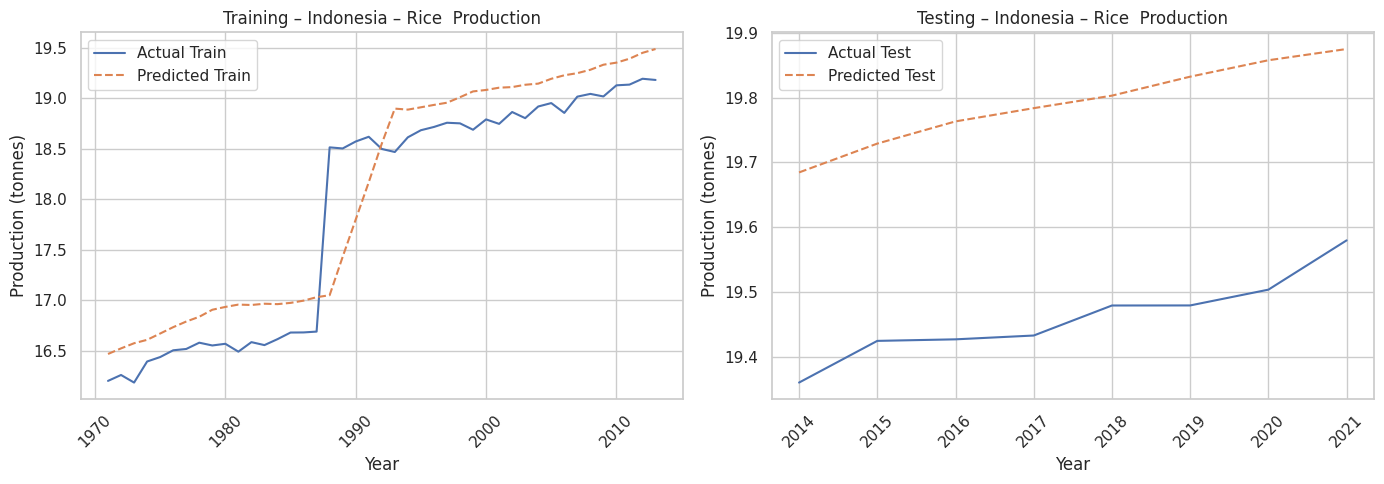


📊 Visualizing forecast for Vietnam – Palm oil  Production


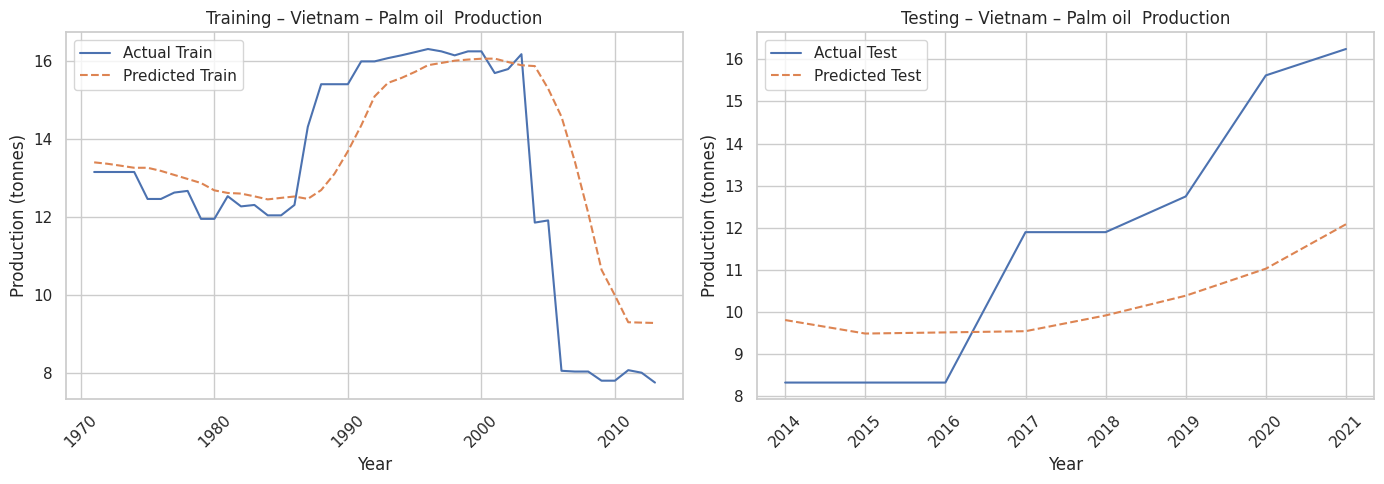


📊 Visualizing forecast for Vietnam – Coffee green Production


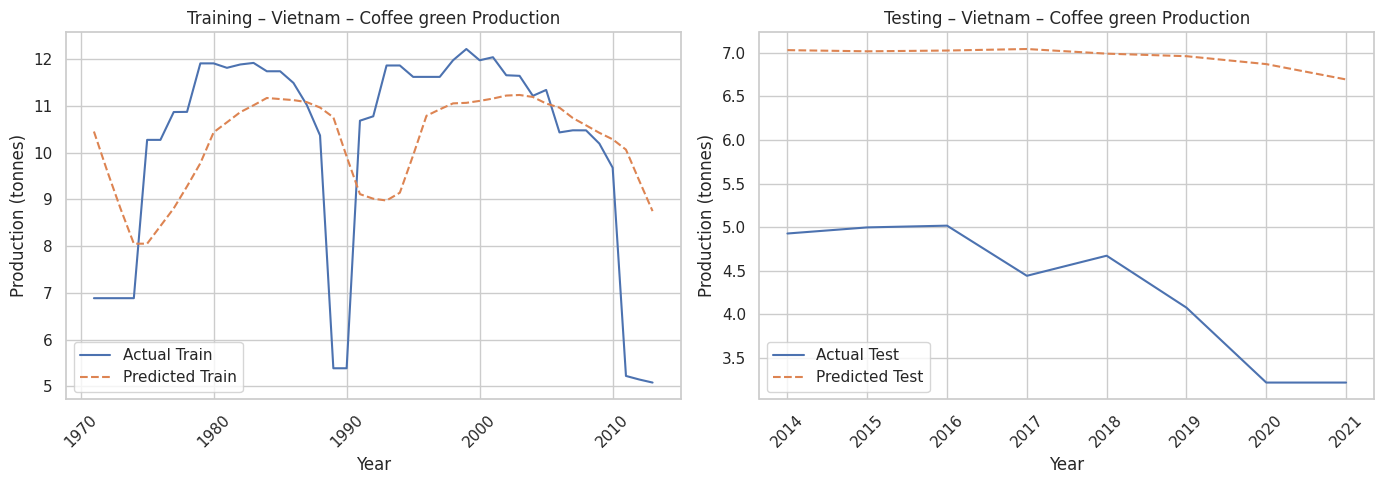


📊 Visualizing forecast for Vietnam – Rice  Production


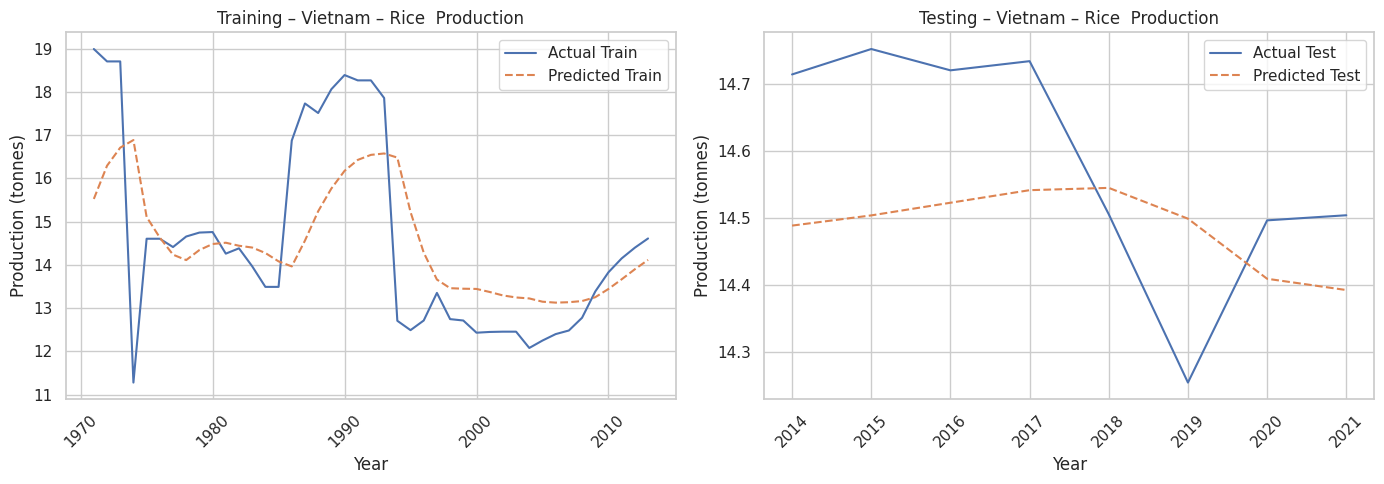


📊 Visualizing forecast for Thailand – Palm oil  Production


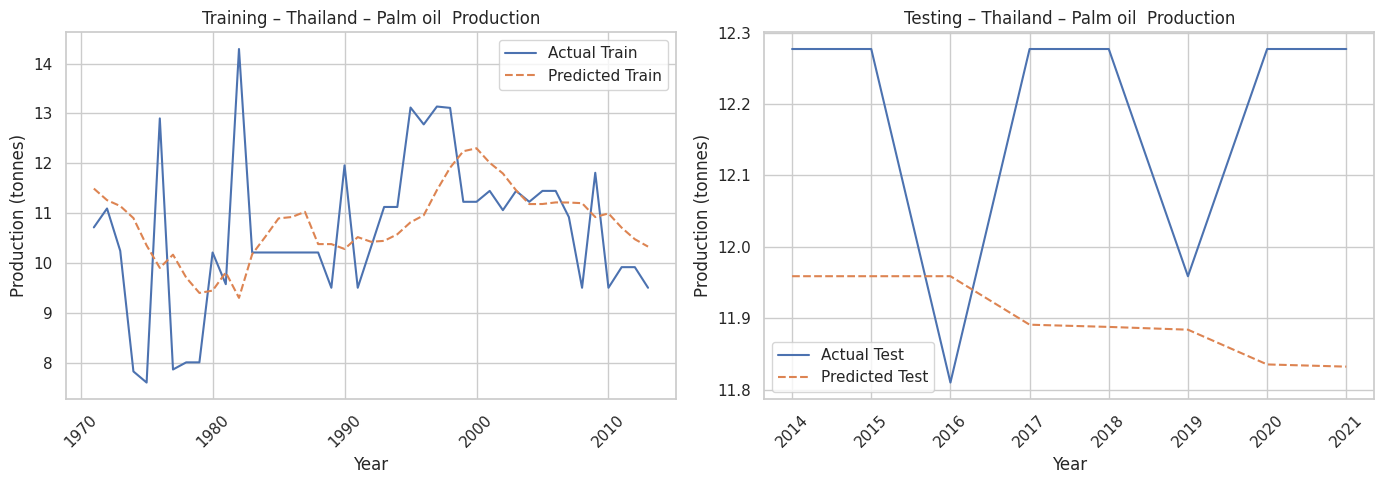


📊 Visualizing forecast for Thailand – Coffee green Production


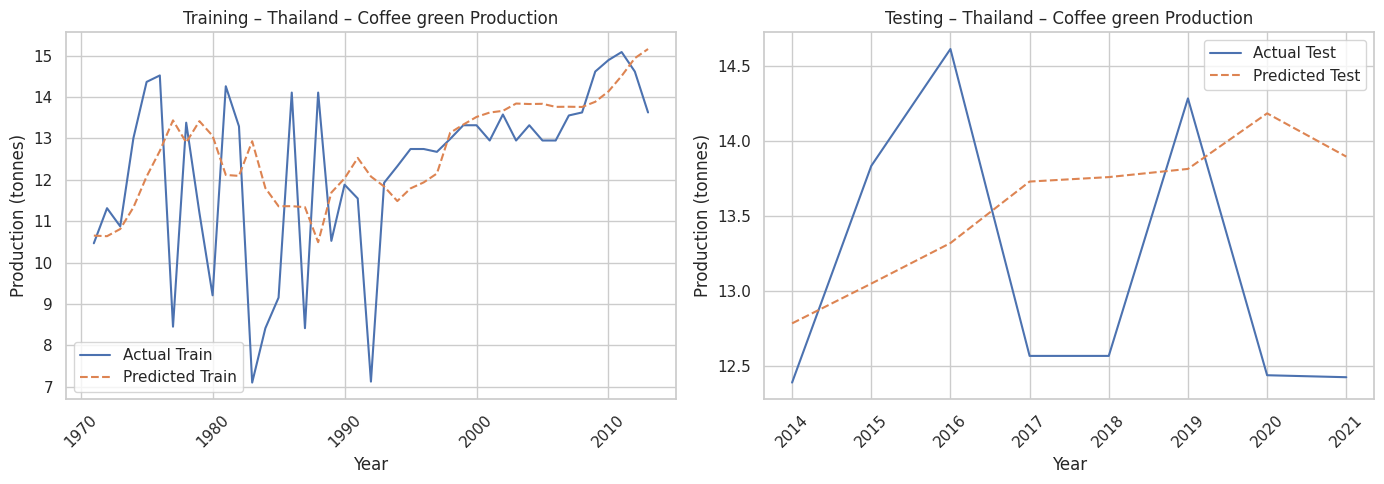


📊 Visualizing forecast for Thailand – Rice  Production


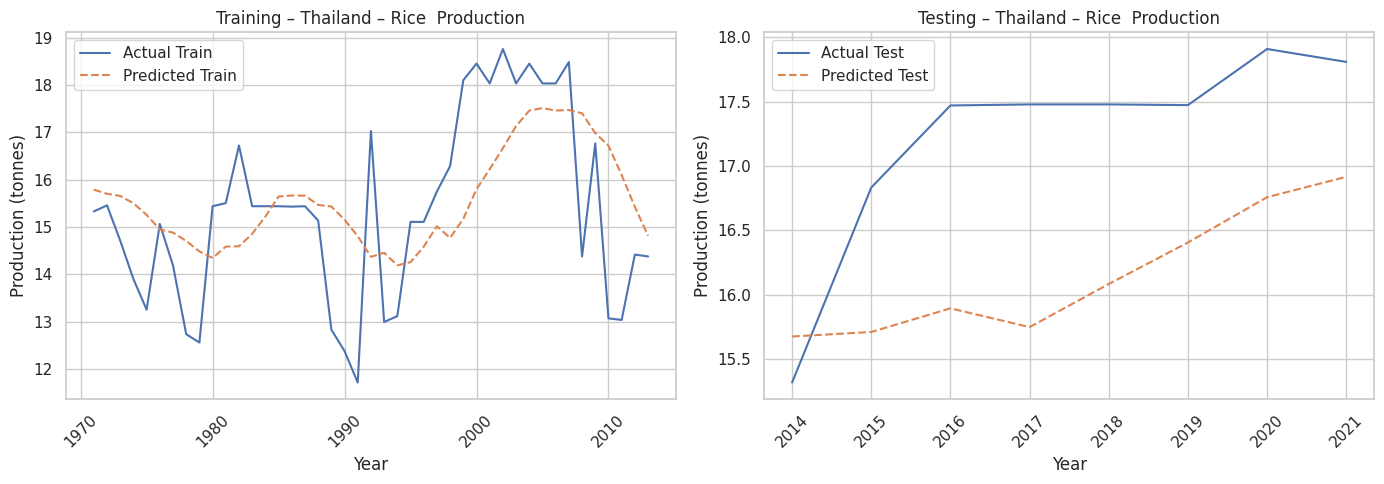


📊 Visualizing forecast for Malaysia – Palm oil  Production


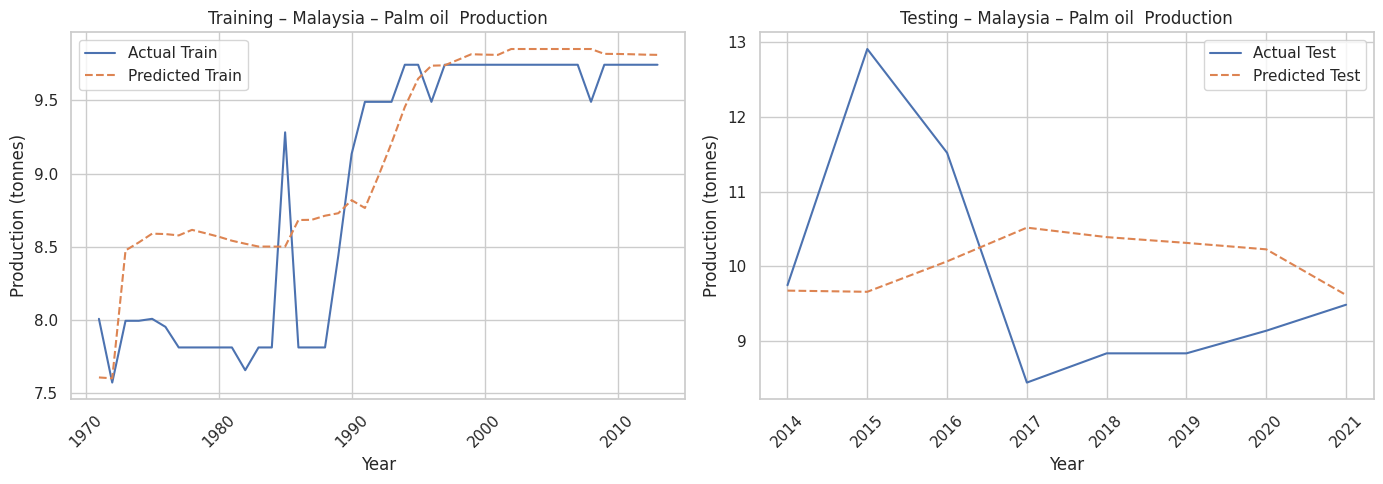


📊 Visualizing forecast for Malaysia – Coffee green Production


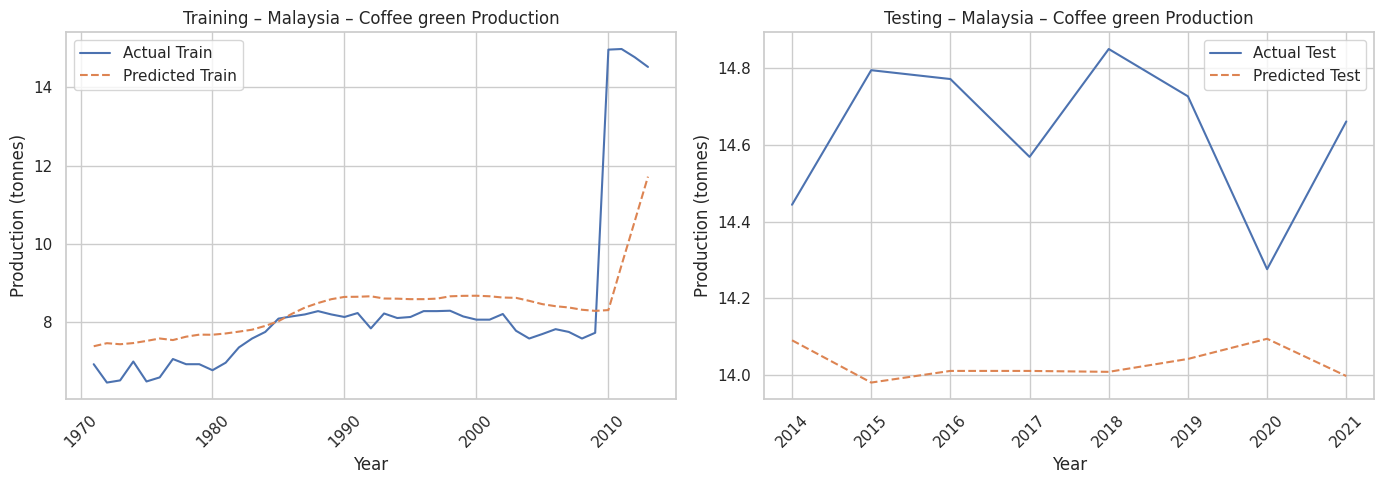


📊 Visualizing forecast for Malaysia – Rice  Production


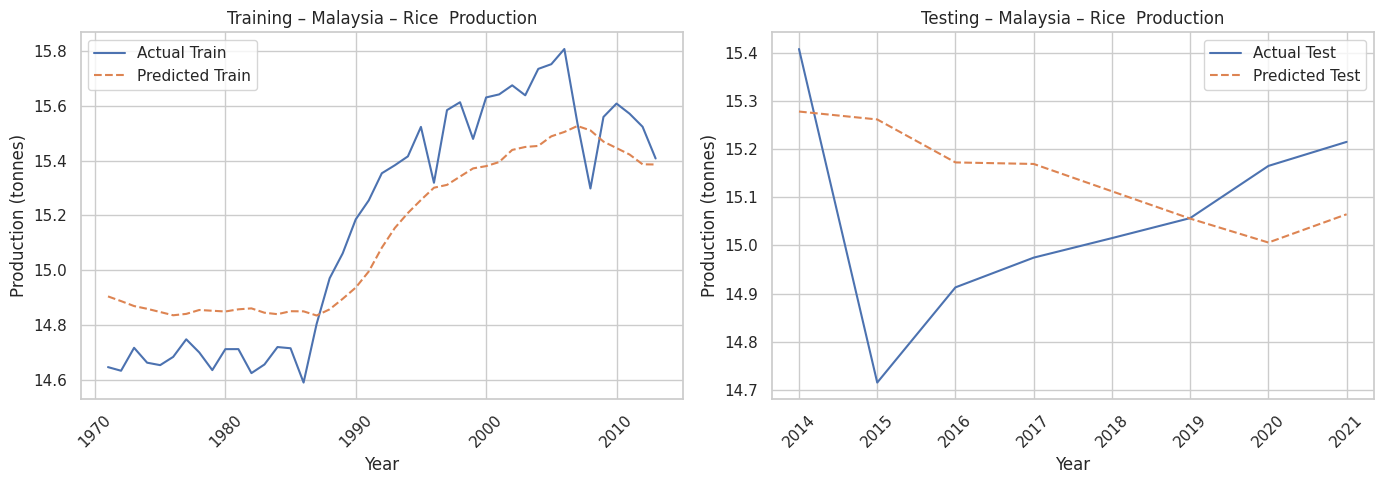

In [447]:
# Loop through all country–commodity pairs and plot predictions with inverse transform
for key in model_results:
    print(f"\n📊 Visualizing forecast for {key}")
    plot_forecast_with_years_original(
        key=key,
        model=model_results[key]['model'],
        data_dict=reshaped_data,
        scalers=scalers,
    )


## Future Prediction

In [448]:
forecast_results = []

look_back = 5
target_year = 2030

for key in model_results:
    model = model_results[key]['model']
    data = reshaped_data[key]
    scaler = scalers[key.split("–")[-1].strip()]
    commodity = key.split("–")[-1].strip()
    country = key.split("–")[0].strip()

    last_sequence = np.concatenate([data['y_train'], data['y_test']])[-look_back:]
    years_last_known = data['years_test'][-1]
    years_to_forecast = target_year - years_last_known

    current_sequence = last_sequence.copy()
    preds_scaled = []

    for _ in range(years_to_forecast):
        input_seq = current_sequence[-look_back:].reshape((1, look_back, 1))
        next_pred = model.predict(input_seq, verbose=0)
        preds_scaled.append(next_pred[0, 0])
        current_sequence = np.append(current_sequence, next_pred[0, 0])

    # Inverse transform to original scale
    preds_actual = scaler.inverse_transform(np.array(preds_scaled).reshape(-1, 1)).flatten()

    forecast_results.append({
        'Country': country,
        'Commodity': commodity,
        'Forecast2030': preds_actual[-1],
        'FromYear': years_last_known + 1,
        'ToYear': target_year
    })

forecast_df = pd.DataFrame(forecast_results)
forecast_df.sort_values(by=['Commodity', 'Forecast2030'], ascending=[True, False])


,Country,Commodity,Forecast2030,FromYear,ToYear
7,Thailand,Coffee green Production,14.878348,2022,2030
10,Malaysia,Coffee green Production,12.608671,2022,2030
1,Indonesia,Coffee green Production,8.964370,2022,2030
4,Vietnam,Coffee green Production,8.657680,2022,2030
3,Vietnam,Palm oil Production,14.365869,2022,2030
6,Thailand,Palm oil Production,11.440905,2022,2030
0,Indonesia,Palm oil Production,10.728310,2022,2030
9,Malaysia,Palm oil Production,9.788208,2022,2030
2,Indonesia,Rice Production,21.193319,2022,2030
8,Thailand,Rice Production,16.177752,2022,2030


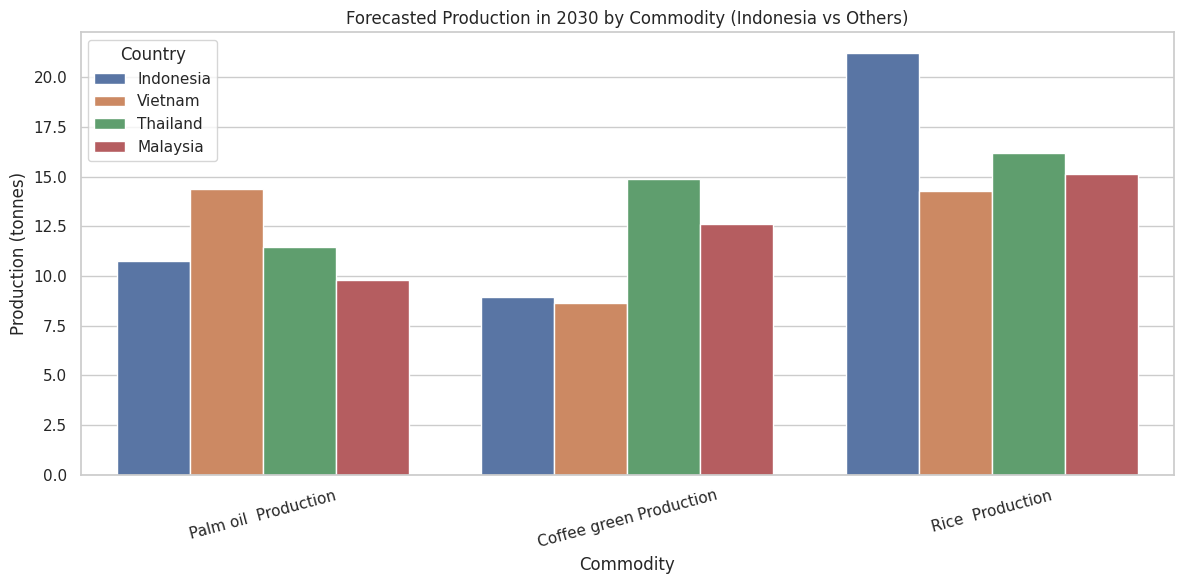

In [449]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Barchart for comparison Indonesia and Others
sns.barplot(data=forecast_df, x='Commodity', y='Forecast2030', hue='Country')

plt.title('Forecasted Production in 2030 by Commodity (Indonesia vs Others)')
plt.ylabel('Production (tonnes)')
plt.xlabel('Commodity')
plt.xticks(rotation=15)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [450]:
def forecast_future(model, last_sequence, n_years, scaler, look_back=5):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_years):
        input_seq = current_sequence[-look_back:].reshape((1, look_back, 1))
        next_pred = model.predict(input_seq, verbose=0)
        predictions.append(next_pred[0, 0])
        current_sequence = np.append(current_sequence, next_pred[0, 0])

    # Inverse transform
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    return predictions


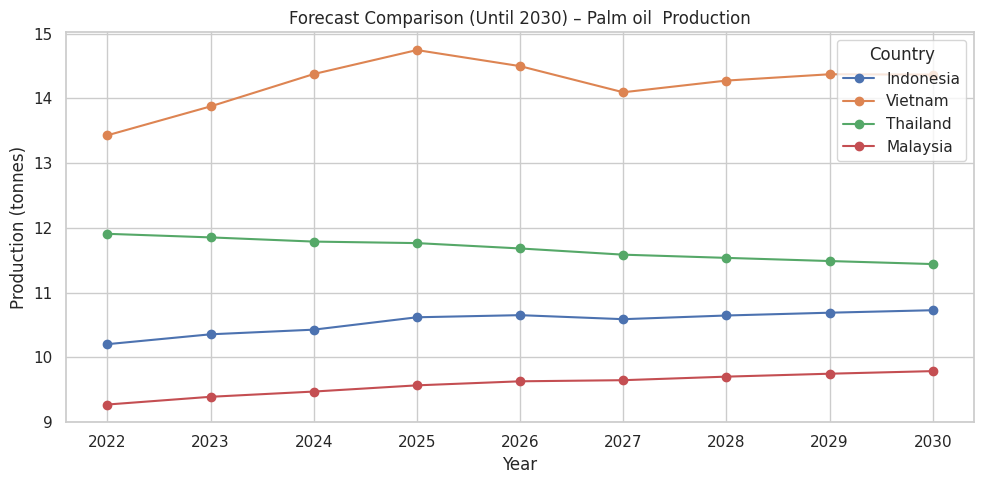

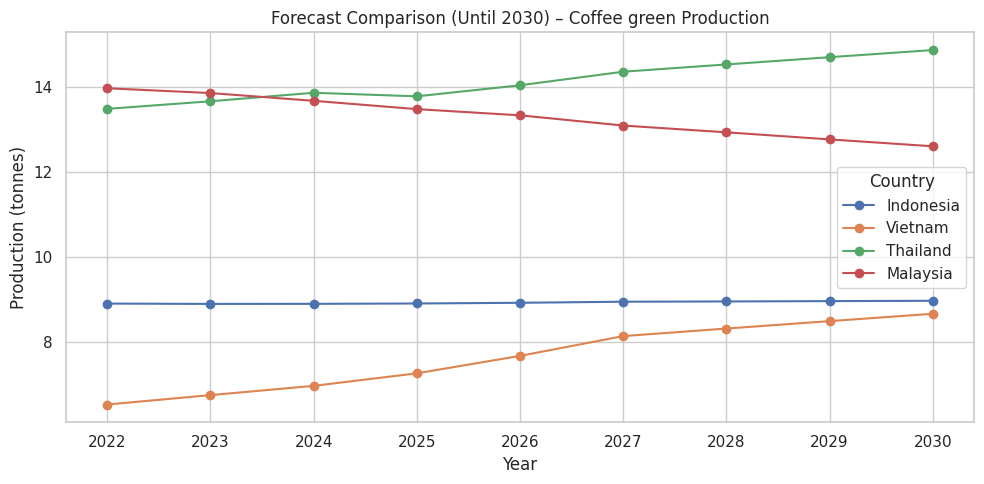

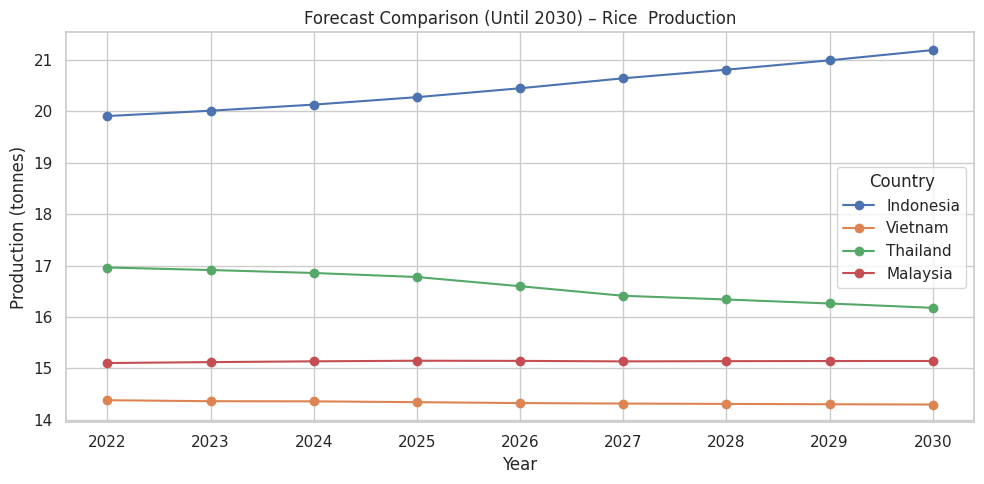

In [451]:
# Create dictionary to group predictions per commodity
forecast_by_commodity = {}

for key in model_results:
    model = model_results[key]['model']
    data = reshaped_data[key]
    scaler = scalers[key.split("–")[-1].strip()]
    commodity = key.split("–")[-1].strip()
    country = key.split("–")[0].strip()

    # Last known sequence and years
    last_sequence = np.concatenate([data['y_train'], data['y_test']])[-5:]
    years_last_known = data['years_test'][-1]
    years_to_forecast = 2030 - years_last_known
    forecast_years = list(range(years_last_known + 1, 2031))

    # Forecast using your function
    preds = forecast_future(model, last_sequence, years_to_forecast, scaler)

    # Save to dictionary
    if commodity not in forecast_by_commodity:
        forecast_by_commodity[commodity] = {}

    forecast_by_commodity[commodity][country] = {
        'years': forecast_years,
        'predictions': preds
    }

# Plot forecast per commodity
for commodity, countries_data in forecast_by_commodity.items():
    plt.figure(figsize=(10, 5))
    for country, values in countries_data.items():
        plt.plot(values['years'], values['predictions'], marker='o', label=country)

    plt.title(f'Forecast Comparison (Until 2030) – {commodity}')
    plt.xlabel('Year'); plt.ylabel('Production (tonnes)')
    plt.grid(True); plt.legend(title='Country')
    plt.tight_layout()
    plt.show()
